<a href="https://colab.research.google.com/github/yandexdataschool/MLatImperial2020/blob/master/02_lab/Solution_lab02_Data_preprocessing_and_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Metrics

There are various different metrics to measure you algorithm's quality. In this exercise we will use ROC AUC. It is simply area under the ROC-curve (that's what AUC stands for - area under curve). ROC-curve is a plot of TPR - true positive rate vs FPR - false positive rate.

A very nice interactive demonstartion of ROC-curves can be found [here](http://arogozhnikov.github.io/2015/10/05/roc-curve.html).

Here is an example in sklearn [click](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

# Data

In [0]:
!wget https://github.com/yandexdataschool/MLatImperial2020/raw/master/02_lab/data.adult.csv

In [27]:
data = pd.read_csv('data.adult.csv')
data.shape

(16280, 14)

In [4]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


### Task 1
- Find all features, that have missing values in them. Missing values have value "?" in this dataset.

In [8]:
data.isin(["?"]).any(axis=0)

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
>50K,<=50K        False
dtype: bool

In [11]:
(data.select_dtypes(exclude=np.number) == '?').any(axis=0)

workclass          True
education         False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
>50K,<=50K        False
dtype: bool

In [9]:
(data == '?').any(axis=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
>50K,<=50K        False
dtype: bool

- Select target variable (salary), delete it from dataset and convert in to binary format.
- Select real valued features (the `DataFrame`'s `select_dtypes` method might help you here)

In [0]:
target = (data['>50K,<=50K'] == '>50K').astype(int)
features_all = data.drop('>50K,<=50K', axis=1) # (data without the target column)
features_numeric = features_all.select_dtypes(include=np.number)
features_string = features_all.select_dtypes(exclude=np.number)

## Now, we are going to train Knn Classifier

Recall, that KNN is a metric based algorithm. It caclulates distance in the given space. It then just assigns a label as a vote of its neighbours. Modifications with different distance weightning can also be used.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# A function to plot score vs param value

def plotting(X, Y, Error, model="KNN"):
    plt.figure(figsize=[12,5])
    plt.title("ROC_AUC score: " + model)
    plt.xlabel('param_value')
    plt.ylabel('ROC_AUC score')
    plt.plot(X, Y,'bo-', color='b', ms=5, label="ROC_AUC score")
    plt.fill_between(X, Y - 1.96 * Error, Y + 1.96 * Error, facecolor='g', alpha=0.6, label="95% confidence interval")
    plt.legend()
    plt.grid()
    plt.show()

Now, your task is to find the optimal number of neighbours using cross-validation with GridSearchCV (see the import above).

Use the function `plotting` defined above, where `X` is the grid searched value of the number of neigbbours,
`Y` is the test score and `Error` is its standard deviation. All this info can be extracted from an instance of the GridSearchCV class, once fitted.

In [29]:
np.unique(target)

array([0, 1])

In [33]:
base_model = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors': np.arange(1, 50)} # GridSearchCV expects you to provide a dictionary
                         # mapping parameter names to arrays of values you
                         # want to do the search over. Here we'll do the search
                         # over only one parameter of KNeighborsClassifier - 'n_neighbors'

gscv = GridSearchCV(base_model,
                    param_grid,
                    scoring='roc_auc',
                    cv=5, n_jobs=-1) # Check the documentation to fill
                                 # in the GridSearchCV constructor call.
                                 # Use 'roc_auc' for the scoring function and
                                 # 5-fold cross-validation. Also, adding
                                 # n_jobs=-1 should make it run faster.


# Call the fit method to run the grid search
gscv.fit(features_numeric, target)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

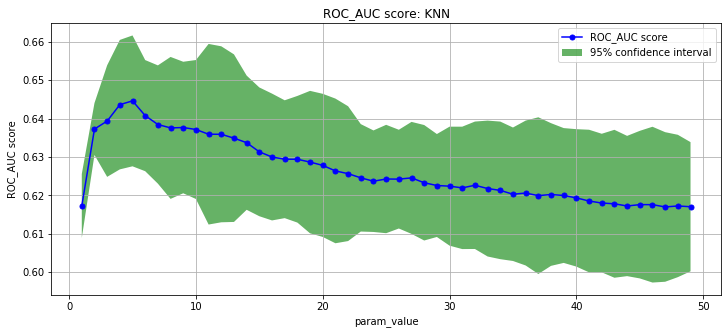

In [35]:
plotting(gscv.param_grid['n_neighbors'],
         gscv.cv_results_['mean_test_score'],
         gscv.cv_results_['std_test_score']) # Explore the contents of gscv.cv_results_ after fitting
                      # to find the resulting scores and their errors

What do you think? What's the problem for such bad results?

#### Plot histograms for age, fnlwgt, capital-gain. What do you observe?

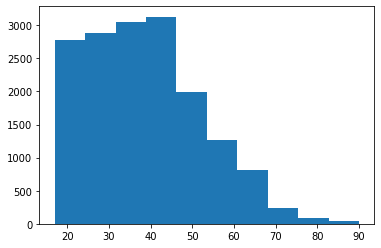

In [36]:
plt.hist(features_numeric.age);

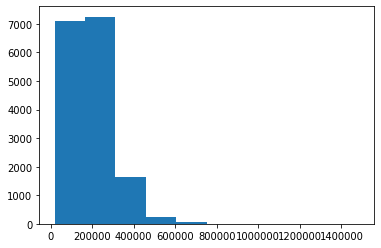

In [38]:
plt.hist(features_numeric.fnlwgt);

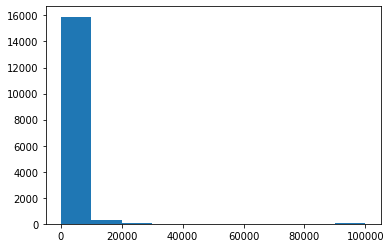

In [39]:
plt.hist(features_numeric['capital-gain']);

We now scale the data, using inbuild Standard Scaler, which standartised features - makes zero mean and unit variance. 

In [0]:
from sklearn.preprocessing import StandardScaler
features_numeric_scaled = features_numeric.copy()
features_numeric_scaled[:] = StandardScaler().fit_transform(features_numeric)

Try running the grid search again, now on the scaled features.

In [42]:
base_model = KNeighborsClassifier(n_jobs=-1)

param_grid = {'n_neighbors': np.arange(1, 50)} # GridSearchCV expects you to provide a dictionary
                         # mapping parameter names to arrays of values you
                         # want to do the search over. Here we'll do the search
                         # over only one parameter of KNeighborsClassifier - 'n_neighbors'

gscv = GridSearchCV(base_model,
                    param_grid,
                    scoring='roc_auc',
                    cv=5, n_jobs=-1) # Check the documentation to fill
                                 # in the GridSearchCV constructor call.
                                 # Use 'roc_auc' for the scoring function and
                                 # 5-fold cross-validation. Also, adding
                                 # n_jobs=-1 should make it run faster.


# Call the fit method to run the grid search
gscv.fit(features_numeric_scaled, target)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

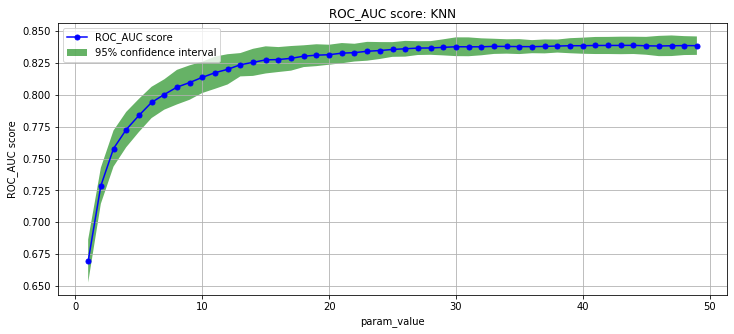

In [43]:
plotting(gscv.param_grid['n_neighbors'],
         gscv.cv_results_['mean_test_score'],
         gscv.cv_results_['std_test_score']) # Explore the contents of gscv.cv_results_ after fitting
                      # to find the resulting scores and their errors

## Remember we had categorical features? Lets try to use them, for the same best n_neighbours we have found. Before we need to encode them - create one-hot encoded representation.

In [45]:
features_string.shape

(16280, 7)

In [44]:
features_one_hot = pd.get_dummies(features_string)
print(features_one_hot.shape)
features_one_hot.head(5)

(16280, 60)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [46]:
features_merged = pd.concat([features_one_hot, features_numeric_scaled], axis=1)

features_merged.head(3)

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-0.339942,0.894267,-0.427720,-0.062143,-0.215504,1.587927
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.100105,0.007787,-0.038253,-0.148709,-0.215504,-0.032711
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,-0.193260,-0.108769,1.130148,-0.148709,-0.215504,-0.032711


In [47]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=52, metric='minkowski', n_jobs=-1)

print("Result: {}".format(
    np.mean(cross_val_score(knn, features_merged, target, scoring='roc_auc', n_jobs=-1, cv=5))
))

Result: 0.8956213925217306


In [0]:
%%html
<img src=http://dogr.io/wow/suchresult/sooneenhot.png width="300">